<a href="https://colab.research.google.com/github/ace-chetana/Amazon-Products-Sales-Analysis-/blob/main/Titanic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###** Importing the libraries and dataset

In [79]:
import numpy as np
import pandas as pd
import pylab as plt

# set the global size of matplotlib figures
plt.rc('figure', figsize = (10,5))

#set the size of my subplots
size_subplots = (10, 10)

#size of histogram bins
bin_size = 10



In [80]:
df_t = pd.read_csv('train.csv')

In [81]:
#check the top five rows and columns of the dataset
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
#check the bottom five rows and columns of the dataset
df_t.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [83]:
df_t.shape

(891, 12)

##**Viewing the info about my dataset**

In [84]:
#helps to check the datatypes
df_t.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [85]:
#Helping us to check on information with the dataset for non-null values
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
#Helping us to find the total number of null values in each column
df_t.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [87]:
df_t.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Age histogram')

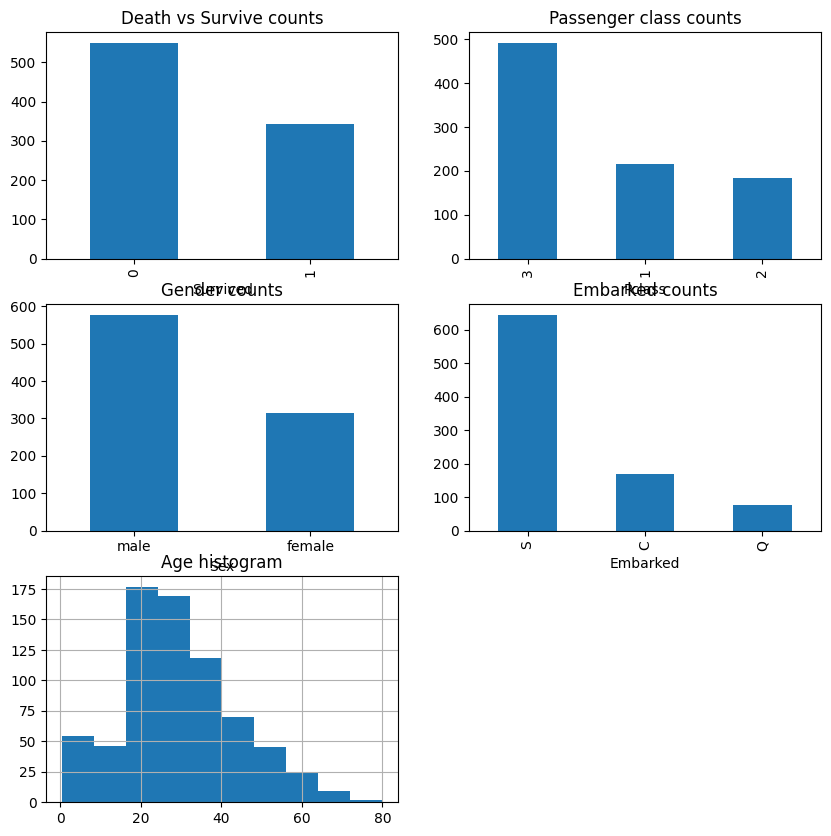

In [88]:
fig = plt.figure(figsize = size_subplots)
fig_dims = (3,2)

plt.subplot2grid(fig_dims, (0,0))
df_t['Survived'].value_counts().plot(kind = 'bar', title = 'Death vs Survive counts')


plt.subplot2grid(fig_dims, (0,1))
df_t['Pclass'].value_counts().plot(kind = 'bar', title = 'Passenger class counts')


plt.subplot2grid(fig_dims, (1,0))
df_t['Sex'].value_counts().plot(kind = 'bar', title = 'Gender counts')

plt.xticks(rotation = 0)

plt.subplot2grid(fig_dims, (1,1))
df_t['Embarked'].value_counts().plot(kind = 'bar', title = 'Embarked counts')


plt.subplot2grid(fig_dims, (2,0))
df_t ['Age'].hist()
plt.title('Age histogram')

## Feature: Passenger Class

In [89]:
pclass_xt = pd.crosstab(df_t['Pclass'], df_t['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

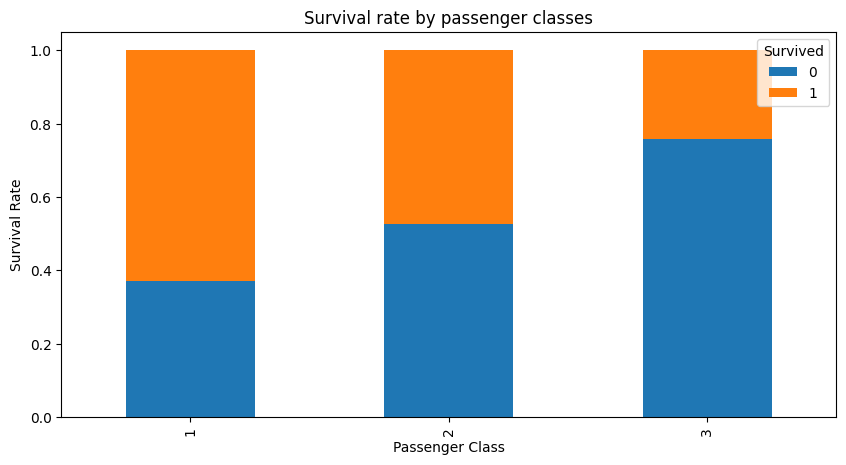

In [90]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis = 0)
pclass_xt_pct.plot(kind = 'bar', stacked = True, title = 'Survival rate by passenger classes')

plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')


## Feature: Gender

In [91]:
sexes = sorted(df_t['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [92]:
df_t['Sex_Val'] = df_t['Sex'].map(genders_mapping).astype(int)
df_t.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<Axes: title={'center': 'Survival rate by gender'}, xlabel='Sex_Val'>

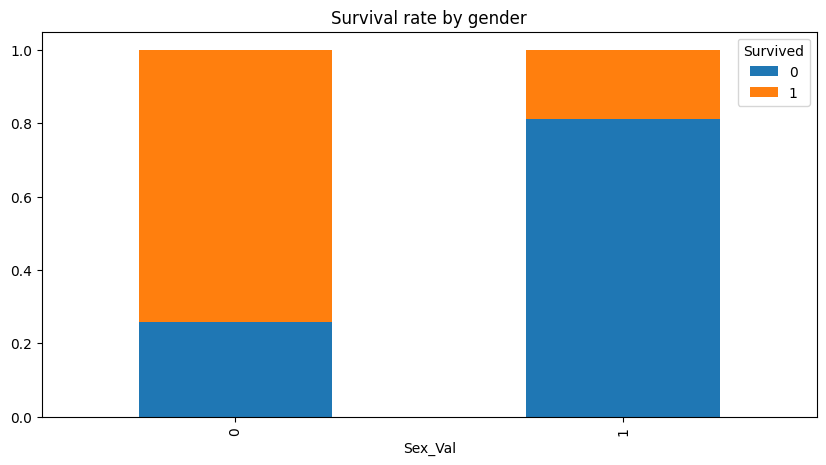

In [93]:
gender_val_xt = pd.crosstab(df_t['Sex_Val'], df_t['Survived'])
gender_val_xt_pct = gender_val_xt.div(gender_val_xt.sum(1).astype(float), axis = 0)
gender_val_xt_pct.plot(kind = 'bar', stacked = True, title = 'Survival rate by gender')

In [94]:
 #unique values of p class
passenger_class = sorted(df_t['Pclass'].unique())

for p_class in passenger_class:
    print ('M-' , p_class, len(df_t[(df_t['Sex'] == 'male') & (df_t['Pclass'] == p_class)]))

    print ('F-' , p_class, len(df_t[(df_t['Sex'] == 'female') & (df_t['Pclass'] == p_class)]))

M- 1 122
F- 1 94
M- 2 108
F- 2 76
M- 3 347
F- 3 144


Text(0, 0.5, 'Survival rate')

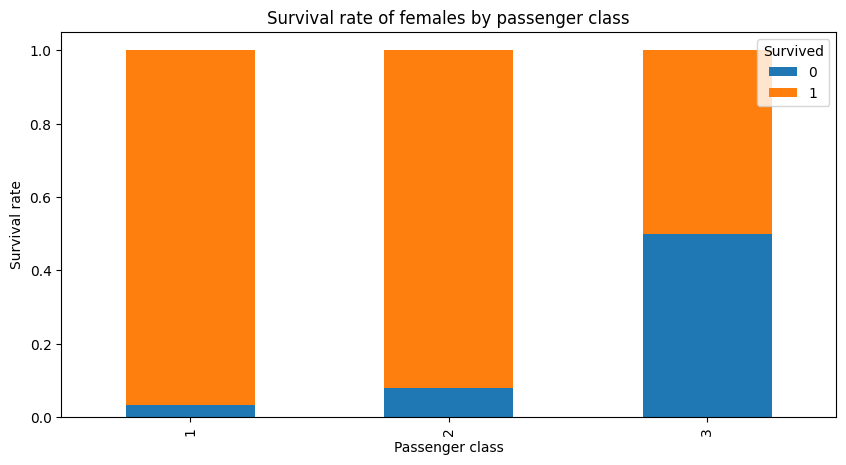

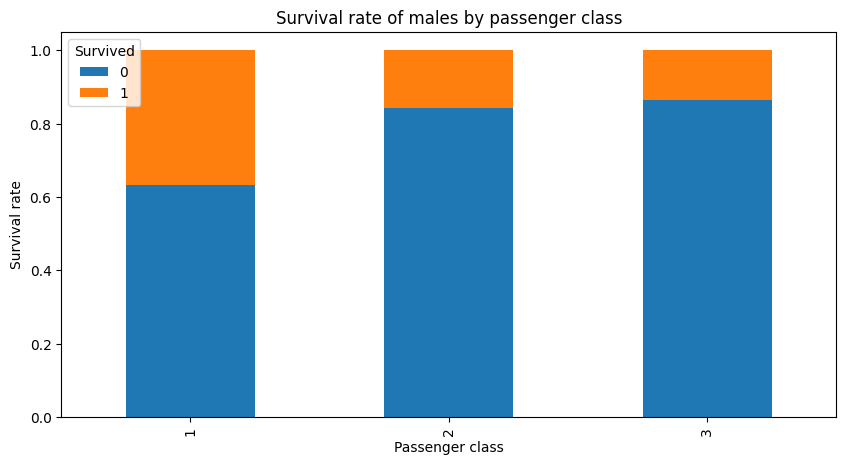

In [95]:
females_df = df_t[df_t['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_t['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis = 0)
females_xt_pct.plot(kind = 'bar', stacked = 'True', title = 'Survival rate of females by passenger class')

plt.xlabel('Passenger class')
plt.ylabel('Survival rate')

males_df = df_t[df_t['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_t['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis = 0)
males_xt_pct.plot(kind = 'bar', stacked = 'True', title = 'Survival rate of males by passenger class')

plt.xlabel('Passenger class')
plt.ylabel('Survival rate')